## Binary Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_churn.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df['Exited'].value_counts(normalize = True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [11]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [12]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 2s 6ms/step - loss: 0.5145 - accuracy: 0.7809 - val_loss: 0.4782 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4577 - accuracy: 0.7987 - val_loss: 0.4525 - val_accuracy: 0.7994
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4343 - accuracy: 0.8075 - val_loss: 0.4355 - val_accuracy: 0.8100
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4196 - accuracy: 0.8200 - val_loss: 0.4230 - val_accuracy: 0.8181
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4083 - accuracy: 0.8275 - val_loss: 0.4091 - val_accuracy: 0.8244
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3968 - accuracy: 0.8378 - val_loss: 0.3961 - val_accuracy: 0.8319
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3852 - accuracy: 0.8423 - val_loss: 0.3814 - val_accuracy: 0.8375

Epoch 58/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3251 - accuracy: 0.8684 - val_loss: 0.3507 - val_accuracy: 0.8469
Epoch 59/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3254 - accuracy: 0.8683 - val_loss: 0.3501 - val_accuracy: 0.8475
Epoch 60/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.8664 - val_loss: 0.3505 - val_accuracy: 0.8500
Epoch 61/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3246 - accuracy: 0.8659 - val_loss: 0.3511 - val_accuracy: 0.8469
Epoch 62/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3247 - accuracy: 0.8666 - val_loss: 0.3515 - val_accuracy: 0.8475
Epoch 63/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3241 - accuracy: 0.8672 - val_loss: 0.3521 - val_accuracy: 0.8469
Epoch 64/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3242 - accuracy: 0.8666 - val_loss: 0.3511 - val_accuracy:

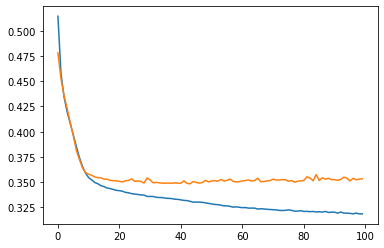

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

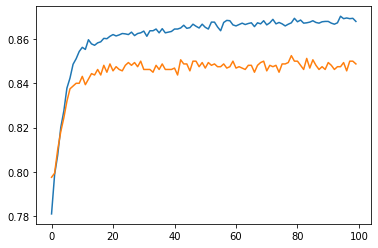

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [24]:
model.layers[0].get_weights()

[array([[-0.09011897,  0.02433511, -0.03251697, -0.12756413,  0.1518851 ,
          0.19065645, -0.33773893, -0.15112557, -0.1131882 , -0.04594292,
          0.42448238],
        [-0.7282736 ,  0.6129923 , -1.0223733 ,  0.00950949, -0.7026052 ,
          0.13283275,  0.6986848 , -0.08567677,  0.3691894 , -0.09642483,
         -0.2602428 ],
        [ 0.08151449,  0.2511403 ,  0.01386339, -0.15532851,  0.3684487 ,
          0.2649654 ,  0.18309084, -0.00683231,  0.21331316, -0.26957452,
         -0.15280408],
        [-0.56763184,  0.02049828,  0.00808189,  0.77757126, -0.5154909 ,
         -0.11290184, -0.6265275 , -0.81279355, -0.03163148, -0.18706024,
         -0.430062  ],
        [-0.3009777 ,  0.06950563, -0.0058711 , -1.0892804 , -0.39761564,
         -1.1788003 ,  0.23879328, -0.95353657,  1.2521923 ,  0.6854754 ,
         -0.30144233],
        [-0.2965977 ,  0.31681937, -0.0165199 , -0.16602619,  0.46909326,
         -0.12005045, -0.29949933, -0.09481917, -0.14019522,  0.3955115

In [25]:
model.layers[1].get_weights()

[array([[-8.09965432e-01, -5.21057487e-01, -4.86337900e-01,
         -2.95285910e-01, -6.25471324e-02,  4.60953340e-02,
          3.28008384e-01, -1.08104020e-01, -8.23495686e-02,
          1.99678943e-01, -9.73017097e-01],
        [ 3.45158070e-01, -5.49186945e-01, -2.97053494e-02,
          2.12002099e-02,  6.93384111e-02, -4.34403270e-01,
          8.04375947e-01,  1.50429621e-01,  2.50908285e-01,
          3.63843292e-02,  3.72087695e-02],
        [ 3.59185301e-02, -6.77735388e-01,  1.77278042e-01,
         -1.73429102e-01,  1.10158570e-01,  3.00453037e-01,
          5.17514646e-01,  5.39240122e-01,  5.37757397e-01,
          4.17745620e-01, -9.54545915e-01],
        [ 2.87763238e-01, -1.91279352e-01,  5.39133608e-01,
          5.38742065e-01,  1.22152813e-01, -8.07743967e-01,
          6.21130355e-02, -3.27165961e-01,  3.57490336e-03,
          8.12207013e-02,  6.79830909e-01],
        [-2.15505064e-02, -4.19353962e-01, -1.04526377e+00,
          5.29790640e-01, -1.13527015e-01,  

In [26]:
model.layers[2].get_weights()

[array([[-0.66840875],
        [ 1.6560273 ],
        [ 0.79375654],
        [-0.14289065],
        [-0.7455537 ],
        [ 0.7316592 ],
        [-0.23851296],
        [-0.74267   ],
        [ 0.7965459 ],
        [-0.7772254 ],
        [ 1.341876  ]], dtype=float32),
 array([-0.30002025], dtype=float32)]

In [27]:
y_log = model.predict(X_test_scaled)
y_log

array([[0.08501732],
       [0.06224576],
       [0.0588274 ],
       ...,
       [0.01665312],
       [0.07557964],
       [0.49316615]], dtype=float32)

In [28]:
y_pred = np.where(y_log > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.863